<a href="https://colab.research.google.com/github/Warre-y/Data-Driven-Engineering/blob/main/Regression/regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise on the use of OLS, Lasso, Ridge and PCR regression

In this exercise we'll check the difference between some regression algorithms.

The goal is to predict a measure of the progression of diabetes from some input features, such as age, body weight, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data = load_diabetes()
features = data.feature_names
X, y = data.data, data.target

print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
# To do:
# - Split the data into train and test
# - Center and scale the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Initialize the StandardScaler
scalerX = StandardScaler()

# scaler on the training data and transform both train and test
X_train_scaled = scalerX.fit_transform(X_train) #you have to first fit_transform and afterwords you can use transform if it is for the same data.
X_test_scaled = scalerX.transform(X_test)

## Ordinary Least-Squares regression

A general regression problem can be written as: $y = f(\mathbf{x})$  with $y \in \mathbb{R}$, $x \in \mathbb{R}^d$ and $f: \mathbb{R}^d \mapsto \mathbb{R}$.
In linear regression, the function is represented by an array of weights: $y = \mathbf{w}^T \mathbf{x} = \sum_{i}^d w_i x_i$.

We need to tune the weights to our process, so we collect some data on the inputs $\mathbf{x}$ and the target $y$. The objective is to tune the weights to minimize the euclidean distance between the observations $\mathbf{y} \in \mathbb{R}^n$ and the predictions $\mathbf{X} \mathbf{w}$:

$\mathbf{w} = \underset{\mathbf{w}}{\mathrm{min}} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2$

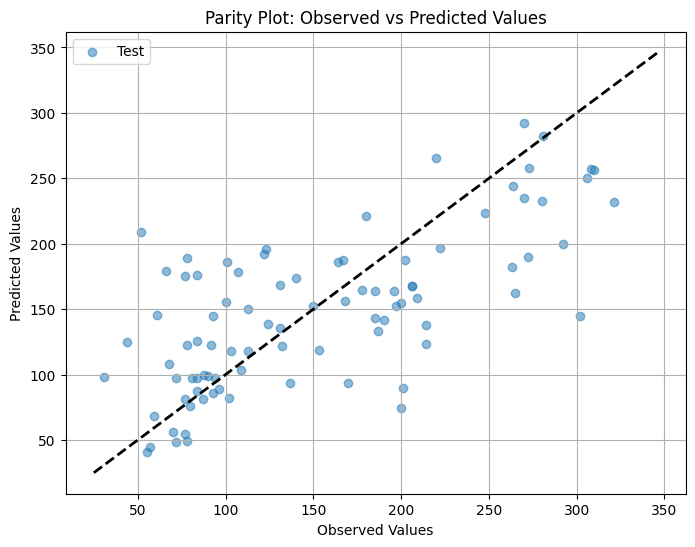

In [13]:
# To do:
# - Fit a Ordinart least squares regression model
# - Do a parity plot (observed vs predicted)
# Fit Ordinary Least Squares regression
from sklearn.linear_model import LinearRegression
OLS_reg = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = OLS_reg.predict(X_train_scaled)
y_test_pred = OLS_reg.predict(X_test_scaled)

# Create parity plot
plt.figure(figsize=(8, 6))
#plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot: Observed vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Metrics

To assess the quality of the regression model, we need to compare the predictions and observations for some points that were not used to train the model.
There are a huge number of different metrics that can be used depending on the case.
Some popular ones are the coefficient of determination $R^2$ and the (root) mean squared error (R)MSE:
\begin{equation}
R^2(\mathbf{y}, \hat{\mathbf{y}}) = 1-\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{equation}

\begin{equation}
\mathrm{MSE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}

\begin{equation}
\mathrm{RMSE}(\mathbf{y}, \hat{\mathbf{y}}) = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
\end{equation}

An overview of error metrics can be found here: https://scikit-learn.org/stable/modules/model_evaluation.html#which-scoring-function-should-i-use

In [ ]:
# To do:
# - Compute the r2, mse and rmse

# from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

## Lasso regression

In the OLS regression model we have included all the input features. However, if some features are not correlated with the output this can decrease the accuracy of the model. The LASSO regression model penalizes the coefficients that are different from zero, forcing the weights to be active only if they improve the model.

The objective function of the LASSO regression problem is:

$\mathbf{w} = \underset{\mathbf{w}}{\mathrm{min}} \frac{1}{2 n} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2 + \alpha ||\mathbf{w}||_1$

In which the coefficient $\alpha$ controls how much we regularize the model.

In [ ]:
# To do:
# - Compute the Lasso regression with a random alpha
# - Print the coefficients of the OLS and Lasso models
# - Print the r2 score of the the models

# from sklearn.linear_model import Lasso

The penalty on the L1 norm is used to promote the sparsity of the regression weights.

To infer the correct value of $\alpha$ to apply we can use the cross-validation.

In [ ]:
# To do:
# - use LassoCV to find the optimal alpha
# - compare the models

# from sklearn.linear_model import LassoCV


## Ridge regression

In Ridge regression, the regularization is applied to the $l_2$ norm of the weights. We want to reduce the magnitude of the weights, so that the model is less sensitive to noise.
The objective function of a Ridge regression problem is:

$\mathbf{w} = \underset{\mathbf{w}}{\mathrm{min}} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2 + \alpha ||\mathbf{w}||_2$

In [ ]:
# To do:
# - Use RidgeCV to fit the ridge model

# from sklearn.linear_model import RidgeCV

## Principal components regression

The principal component regression is the same as the OLS regression, with an extra-step: the PCA is applied to the X matrix, and the linear regression is performed on the new projected data.

In [ ]:
# To do:
# - Compute the PCA transform of the data (X)
# - Fit a regression model on the transformed data (Z)
# - Compare the R2 score with OLS

# from sklearn.decomposition import PCA


This added step has two benefits:

* The features become uncorrelated between them.
* The dimensionality of the feature matrix can be reduced.

In [ ]:
# To do:
# - Do the same as in the previous cell using only 5 PCs